In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


In [2]:
notas = pd.read_csv("ratings.csv")
display(notas.head())
print(notas.shape)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


(100836, 4)


In [3]:
notas.columns = 'usuarioID', 'filme_id', 'nota', 'momento'
notas.head()

,usuarioID,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
#quantas vezes e ordenado 
notas['nota'].value_counts(sort = True,bins = 4)


(3.875, 5.0]      48580
(2.75, 3.875]     33183
(1.625, 2.75]     13101
(0.495, 1.625]     5972
Name: nota, dtype: int64

In [6]:
print(notas['nota'].mean())
print(notas.nota.median())

3.501556983616962
3.5


<AxesSubplot:ylabel='Frequency'>

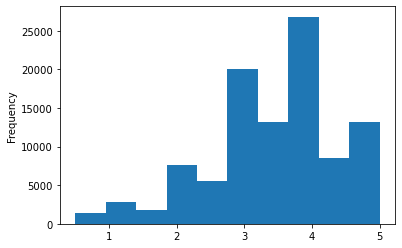

In [7]:
#acesar coluna sem parenteses e plotar histograma
notas.nota.plot(kind='hist')

In [8]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

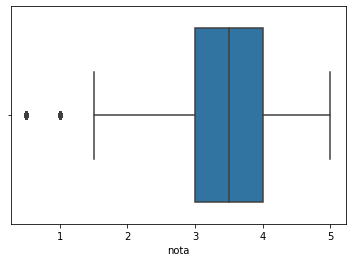

In [9]:
#plotar estatisticas seaborn
sns.boxplot(notas.nota)

In [10]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###NOTAS POR FILME

In [11]:
movies.columns = 'filme_id', 'titulo', 'genero'
movies.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.groupby('filme_id')

In [13]:
media_por_filme = notas.groupby('filme_id').mean().nota
media_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

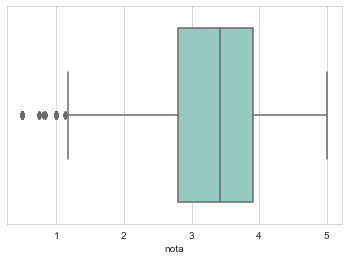

In [14]:
sns.set_style("whitegrid")
sns.boxplot(media_por_filme, palette="Set3")

<AxesSubplot:ylabel='nota'>

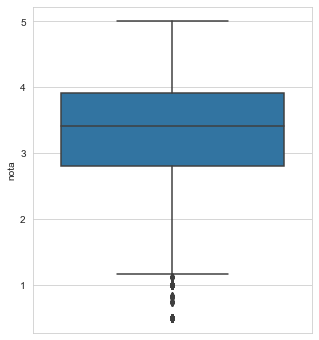

In [15]:
plt.figure(figsize=(5,6))
sns.boxplot(y=media_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

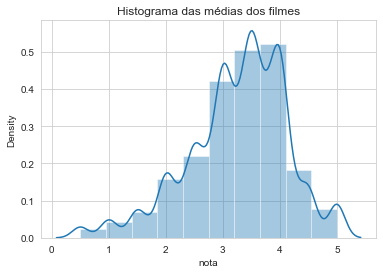

In [16]:
sns.distplot(media_por_filme,bins=10)
plt.title("Histograma das médias dos filmes")


In [17]:
movies.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
notas_id1 = notas.query('filme_id == 1')
notas_id2 = notas.query('filme_id == 2')
print(len(notas_id1), len(notas_id2))

215 110


In [56]:
print(f'''Toy Story mean: {notas_id1.nota.mean():2f},
      \nJumanji mean: {notas_id2.nota.mean():2f}''')

Toy Story mean: 3.920930,
      
Jumanji mean: 3.431818


<AxesSubplot:xlabel='filme_id', ylabel='nota'>

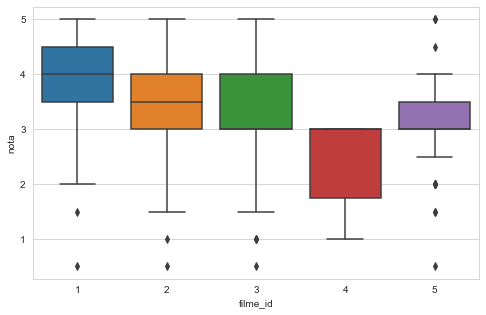

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'filme_id', y = 'nota', 
            data = notas.query('filme_id in [1,2,3,4,5]'))